In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
rawdata1 = pd.read_csv("volume_2016.csv",skiprows=(0), index_col=((0)))
rawdata=rawdata1.head(10000)
np.shape(rawdata)


# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(rawdata)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6700 3300


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
7s - loss: 0.1133
Epoch 2/100
6s - loss: 0.0142
Epoch 3/100
6s - loss: 0.0095
Epoch 4/100
6s - loss: 0.0042
Epoch 5/100
6s - loss: 8.8716e-04
Epoch 6/100
6s - loss: 2.5680e-04
Epoch 7/100
6s - loss: 2.1365e-04
Epoch 8/100
6s - loss: 1.8780e-04
Epoch 9/100
6s - loss: 1.6300e-04
Epoch 10/100
6s - loss: 1.4247e-04
Epoch 11/100
6s - loss: 1.2840e-04
Epoch 12/100
6s - loss: 1.2187e-04
Epoch 13/100
6s - loss: 1.1826e-04
Epoch 14/100
6s - loss: 1.1711e-04
Epoch 15/100
6s - loss: 1.1745e-04
Epoch 16/100
6s - loss: 1.1688e-04
Epoch 17/100
6s - loss: 1.1604e-04
Epoch 18/100
6s - loss: 1.1547e-04
Epoch 19/100
6s - loss: 1.1723e-04
Epoch 20/100
6s - loss: 1.1602e-04
Epoch 21/100
6s - loss: 1.1656e-04
Epoch 22/100
6s - loss: 1.1646e-04
Epoch 23/100
6s - loss: 1.1577e-04
Epoch 24/100
6s - loss: 1.1539e-04
Epoch 25/100
6s - loss: 1.1636e-04
Epoch 26/100
6s - loss: 1.1505e-04
Epoch 27/100
6s - loss: 1.1518e-04
Epoch 28/100
6s - loss: 1.1486e-04
Epoch 29/100
6s - loss: 1.1474e-04
Epoch 30/1

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 8.90 RMSE
Test Score: 8.14 RMSE


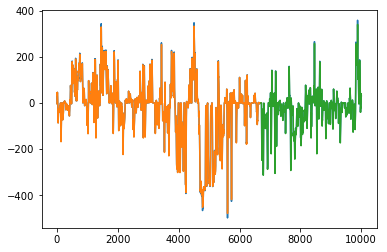

In [12]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()